# <b>ДАННЫЙ ПРОЕКТ НЕ ЗАКОНЧЕН. В ПРОЦЕССЕ ВЫПОЛНЕНИЯ!</b>

#<b>Проект: Исследование объема продаж видеоигр.</b>


##<b>Описание проекта</b>

Набор данных содержит список видеоигр с объемом продаж более 100 000 копий.<br>
Всего насчитывается 16 598 записей. 2 записи были удалены из-за неполной информации.

##<b>Описание данных</b>

- <b>Rank</b> - рейтинг общих продаж;
- <b>Name</b> - наименование игры;
- <b>Platform</b> - игровая платформа(PC, PS4, и т. д);
- <b>Year</b> - год релиза;
- <b>Genre</b> - жанр;
- <b>Publisher</b> - издатель;
- <b>NA_Sales</b> - продажи в Северной Америке (в миллионах);
- <b>EU_Sales</b> - продажи в Европе (в миллионах);
- <b>JP_Sales</b> - продажи в Японии (в миллионах);
- <b>Other_Sales</b> - продажи в остальном мире (в миллионах);
- <b>Global_Sales</b> - общий объем продаж по всему миру.

##<b>Задачи исследования</b>

<b>Предобработка данных</b>

<b>Исследовательский анализ данных</b>

<b>Общий вывод</b>

In [1]:
!gdown --id 1pw5u0qFpA9QQExsb7gXJLwccDLEx5Tah

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pw5u0qFpA9QQExsb7gXJLwccDLEx5Tah
To: /content/vgsales.csv
100% 1.36M/1.36M [00:00<00:00, 126MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('vgsales.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [18]:
df['year'] = df['year'].astype(int)

In [8]:
df.isna().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [9]:
df['year'] = df['year'].fillna(0)

In [10]:
df['publisher'] = df['publisher'].fillna('unknown')

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,1973.647307,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,254.346809,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


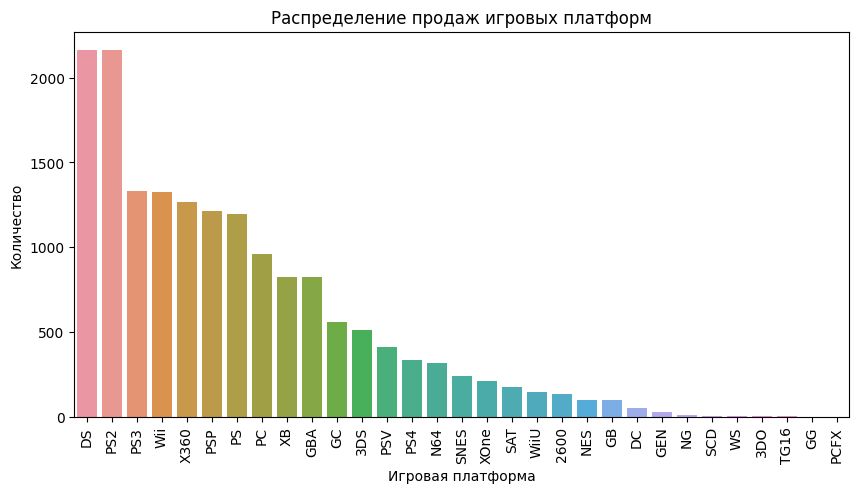

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='platform', order=df['platform'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Игровая платформа')
plt.ylabel('Количество')
plt.title('Распределение продаж по игровым платформам')
plt.show()

In [88]:
df['platform'].value_counts() / len(df['platform']) * 100

DS      13.031691
PS2     13.019641
PS3      8.006989
Wii      7.982890
X360     7.621400
PSP      7.308109
PS       7.205687
PC       5.783829
XB       4.964454
GBA      4.952404
GC       3.349801
3DS      3.066635
PSV      2.488252
PS4      2.024340
N64      1.921918
SNES     1.439933
XOne     1.283287
SAT      1.042294
WiiU     0.861550
2600     0.801301
NES      0.590433
GB       0.590433
DC       0.313291
GEN      0.162670
NG       0.072298
SCD      0.036149
WS       0.036149
3DO      0.018074
TG16     0.012050
GG       0.006025
PCFX     0.006025
Name: platform, dtype: float64

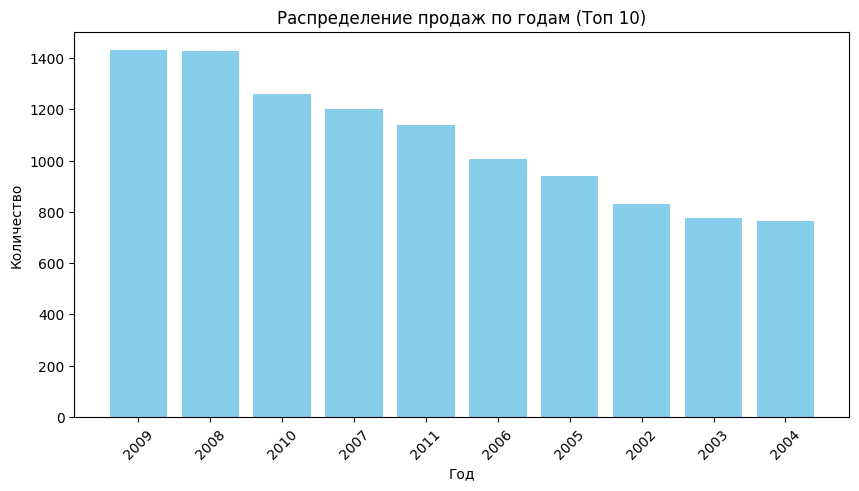

In [48]:
top_10_years = df['year'].value_counts().head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_10_years.index.astype(str), top_10_years.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Год')
plt.ylabel('Количество')
plt.title('Распределение продаж по годам (Топ 10)')
plt.show()

In [86]:
top_10_years / len(df['year']) * 100

2009    8.621521
2008    8.603446
2010    7.585251
2007    7.241836
2011    6.862273
2006    6.073021
2005    5.669358
2002    4.994578
2003    4.669237
2004    4.596939
Name: year, dtype: float64

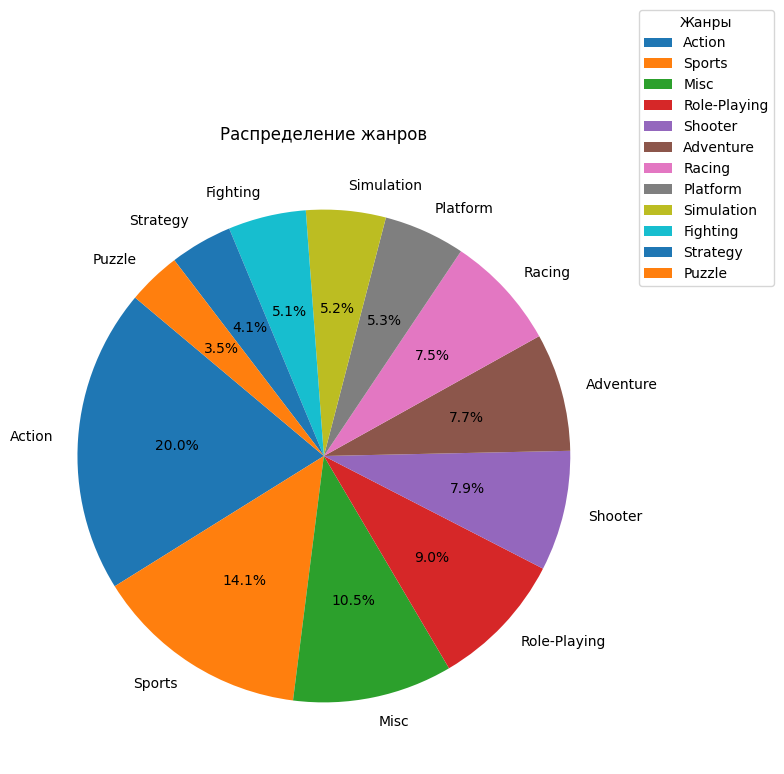

In [68]:
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.legend(genre_counts.index, title='Жанры', loc='center left', bbox_to_anchor=(1, 1))
plt.title('Распределение жанров')
plt.show()

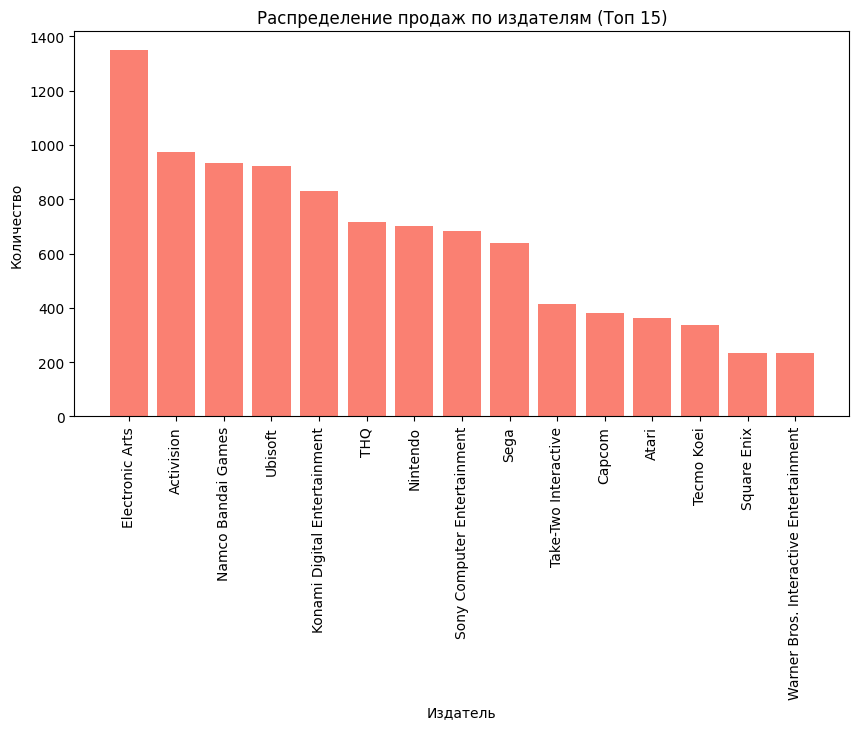

In [84]:
top_15_publishers = df['publisher'].value_counts().head(15)
plt.figure(figsize=(10, 5))
plt.bar(top_10_publishers.index, top_10_publishers.values, color='salmon')
plt.xticks(rotation=90)
plt.xlabel('Издатель')
plt.ylabel('Количество')
plt.title('Распределение продаж по издателям (Топ 15)')
plt.show()

In [85]:
top_15_publishers / len(df['publisher']) * 100

Electronic Arts                           8.139535
Activision                                5.874202
Namco Bandai Games                        5.615134
Ubisoft                                   5.548861
Konami Digital Entertainment              5.012652
THQ                                       4.307748
Nintendo                                  4.235450
Sony Computer Entertainment               4.114954
Sega                                      3.849861
Take-Two Interactive                      2.488252
Capcom                                    2.295457
Atari                                     2.187010
Tecmo Koei                                2.036390
Square Enix                               1.403784
Warner Bros. Interactive Entertainment    1.397759
Name: publisher, dtype: float64

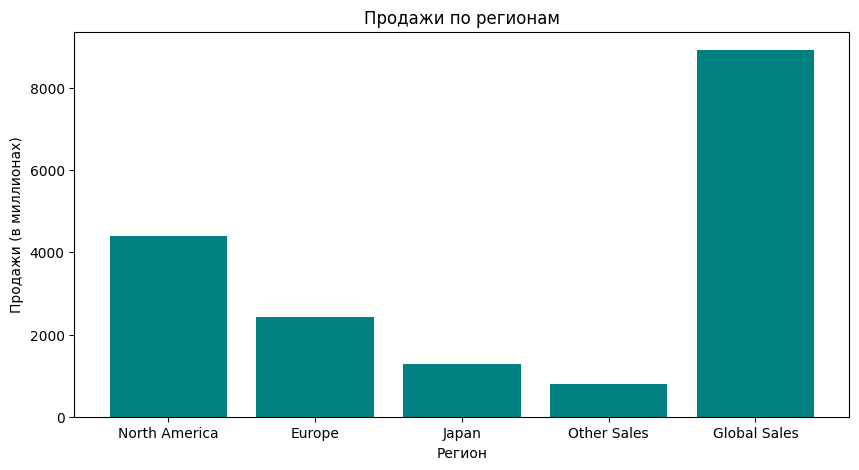

In [105]:
sales_data = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].sum().round()
labels = ['North America', 'Europe', 'Japan', 'Other Sales', 'Global Sales']
plt.figure(figsize=(10, 5))
plt.bar(labels, sales_data, color='teal')
plt.xlabel('Регион')
plt.ylabel('Продажи (в миллионах)')
plt.title('Продажи по регионам')
plt.show()